## k-means

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

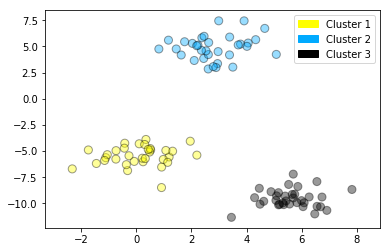

In [8]:
X,y = make_blobs(random_state=10)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

plot_labelled_scatter(X,kmeans.labels_,['Cluster 1','Cluster 2','Cluster 3'])

In [9]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_63a9cff2ccd745f4aac0141b03cee536 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cEkITcKpSqIivMFetABvhrJF560Yblivtr_CN6eEn6kj',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_63a9cff2ccd745f4aac0141b03cee536.get_object(Bucket='appleexample-donotdelete-pr-yizabrb7keakap',Key='fruit_data_with_colors.txt.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

fruits = pd.read_csv(body)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


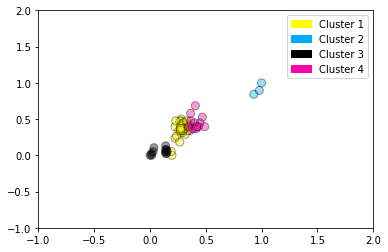

In [23]:
X_fruits = fruits[['mass','width','height','color_score']].as_matrix()
y_fruits = fruits['fruit_label']
X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_fruits)

plot_labelled_scatter(X_fruits_normalized,kmeans.labels_,['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

## agglomerative clustering

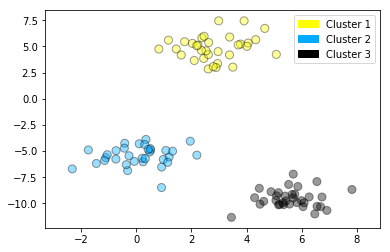

In [17]:
from sklearn.cluster import AgglomerativeClustering
X,y = make_blobs(random_state=10)
cls = AgglomerativeClustering(n_clusters=3)
cls_assignment = cls.fit_predict(X)
X,y = make_blobs(random_state=10)
plot_labelled_scatter(X,cls_assignment,['Cluster 1','Cluster 2','Cluster 3'])

## Dendrogram example

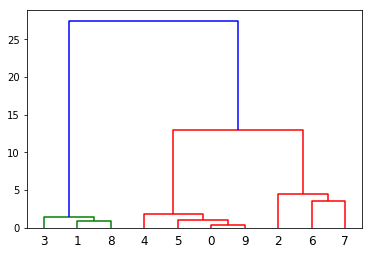

In [24]:
from scipy.cluster.hierarchy import ward,dendrogram
X,y = make_blobs(random_state=10,n_samples=10)
plt.figure()
dendrogram(ward(X))
plt.show()

## dbscan

Cluster membership values: [ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


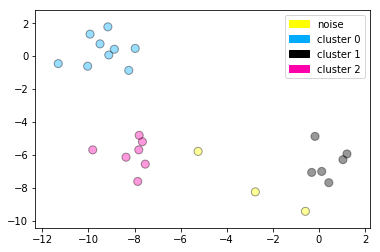

In [28]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state=9,n_samples=25)
dbscan = DBSCAN(eps=2,min_samples=2)
cls = dbscan.fit_predict(X)
print("Cluster membership values: {}".format(cls) )
plot_labelled_scatter(X,cls+1,['noise','cluster 0','cluster 1','cluster 2'])